In [5]:
!pip install pykrx


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import datetime 

now = datetime.datetime.now()
today = now.strftime("%Y%m%d")
today

'20241216'

In [7]:
from pykrx import stock

df = stock.get_market_ohlcv_by_date("20151001", today, "229200")
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300
2015-10-05,10255,10265,10210,10231,43154,0.817895
2015-10-06,10248,10274,10172,10176,42399,-0.537582
2015-10-07,10094,10094,9947,9949,21324,-2.230739
...,...,...,...,...,...,...
2024-12-10,10950,11325,10950,11275,31030778,4.688951
2024-12-11,11275,11470,11215,11345,16372372,0.620843
2024-12-12,11480,11590,11295,11580,11709088,2.071397


In [8]:
# df.to_excel("data/229200.xlsx")

# 10. 코스닥 ETF 변동성 돌파 전략

In [9]:
import pandas as pd

df = pd.read_excel("data/229200.xlsx", index_col="날짜")
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2015-10-01,10279,10279,10211,10216,30032
2015-10-02,10250,10275,10250,10263,60029
2015-10-05,10374,10384,10326,10347,40976
2015-10-06,10365,10392,10287,10291,40252
2015-10-07,10211,10211,10061,10062,20248
...,...,...,...,...,...
2021-09-02,15095,15160,15045,15105,1874702
2021-09-03,15115,15215,15085,15175,1388557
2021-09-06,15170,15270,15110,15185,2252617


In [10]:
df['변동'] = df['고가'] - df['저가']
df.head()

,시가,고가,저가,종가,거래량,변동
날짜,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68
2015-10-02,10250,10275,10250,10263,60029,25
2015-10-05,10374,10384,10326,10347,40976,58
2015-10-06,10365,10392,10287,10291,40252,105
2015-10-07,10211,10211,10061,10062,20248,150


In [11]:
df['전일변동'] = df['변동'].shift(1)
df.head()

,시가,고가,저가,종가,거래량,변동,전일변동
날짜,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0
2015-10-06,10365,10392,10287,10291,40252,105,58.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0


In [12]:
df['목표가'] = df['시가'] + df['전일변동'] * 0.5
df.head()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가
날짜,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5


In [13]:
import numpy as np

df['수익률'] = np.where(df['고가'] >= df['목표가'], df['종가']/df['목표가'], 1)
df.head()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률
날짜,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.0
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.0
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.0


In [14]:
df['누적수익률'] = df['수익률'].cumprod()
df.tail()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률
날짜,,,,,,,,,,
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993
2021-09-07,15165,15235,15120,15235,819776,115,160.0,15245.0,1.000000,2.202993
2021-09-08,15170,15180,14900,14925,1459414,280,115.0,15227.5,1.000000,2.202993


In [15]:
delta = df.index[-1] - df.index[0]
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** (1 / year) -1
print("CAGR: ", CAGR * 100)

CAGR:  14.214796770147164


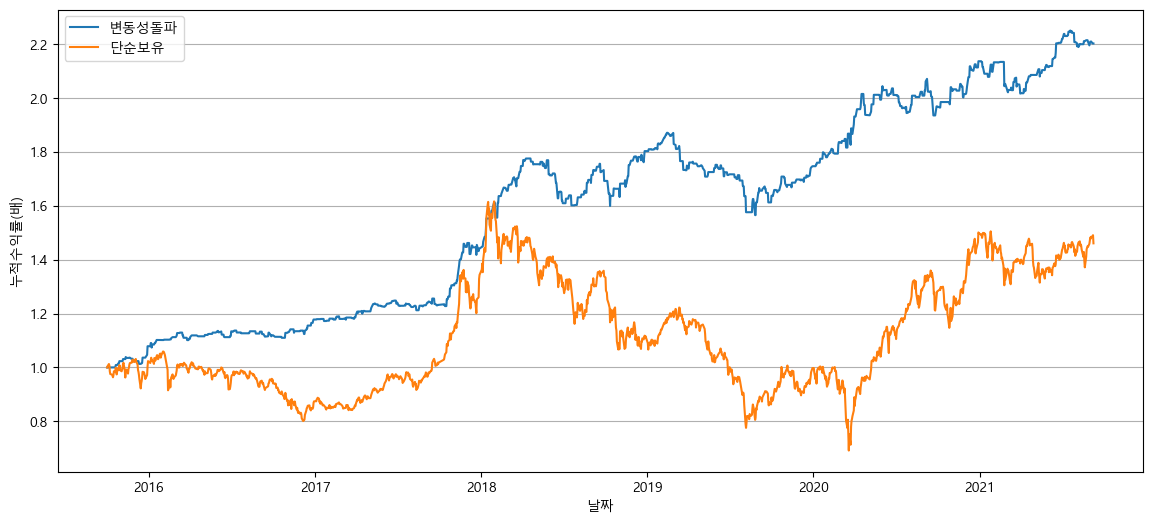

In [16]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['누적수익률'], label="변동성돌파")
ax.plot(df['종가'] / df['종가'].iloc[0], label="단순보유")

plt.xlabel('날짜')
plt.ylabel('누적수익률(배)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [17]:
df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100
df.tail()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률,전고점,DD
날짜,,,,,,,,,,,,
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883,2.251132,1.832337
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247,2.251132,1.816161
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993,2.251132,2.138393
2021-09-07,15165,15235,15120,15235,819776,115,160.0,15245.0,1.000000,2.202993,2.251132,2.138393
2021-09-08,15170,15180,14900,14925,1459414,280,115.0,15227.5,1.000000,2.202993,2.251132,2.138393


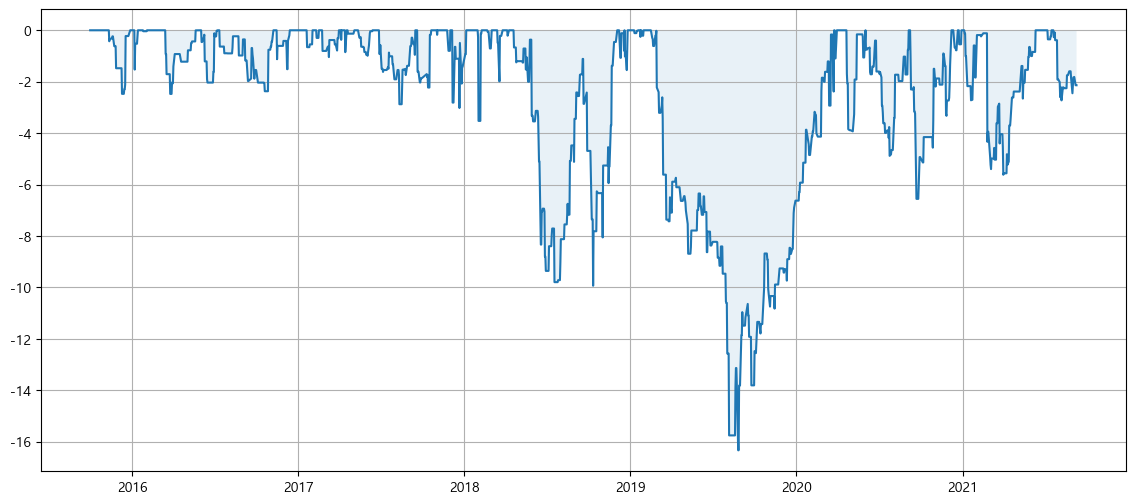

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['DD'] * -1)
ax.fill_between(df.index, df['DD'] * -1, alpha=0.1)
ax.grid()
plt.show()

In [19]:
df['DD'].max()

16.335015560662914

In [20]:
df['MA10'] = df['종가'].rolling(window=10).mean()
df.head(n=10)

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10
날짜,,,,,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.0,1.0,1.0,0.0,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.0,1.0,1.0,0.0,NaN
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.0,1.0,1.0,0.0,NaN
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.0,1.0,1.0,0.0,NaN
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.0,1.0,1.0,0.0,NaN
2015-10-08,10118,10137,9898,9968,40068,239,150.0,10193.0,1.0,1.0,1.0,0.0,NaN
2015-10-12,9966,9966,9936,9943,40071,30,239.0,10085.5,1.0,1.0,1.0,0.0,NaN
2015-10-13,9983,9983,9891,9892,20026,92,30.0,9998.0,1.0,1.0,1.0,0.0,NaN
2015-10-14,9886,9917,9842,9844,22141,75,92.0,9932.0,1.0,1.0,1.0,0.0,NaN


In [21]:
df['매매신호'] = df['시가'] > df['MA10'].shift(1)   # 당일 시가 > 전일 종가까지로 계산된 10일 이동평균

In [22]:
df['수익률2'] = np.where((df['매매신호'] == 1) & (df['고가'] >= df['목표가']), 
                        df['종가'] / df['목표가'], 
                        1)

In [23]:
df['누적수익률2'] = df['수익률2'].cumprod()

In [24]:
df['누적수익률2'].iloc[-1]

1.6154077758801972

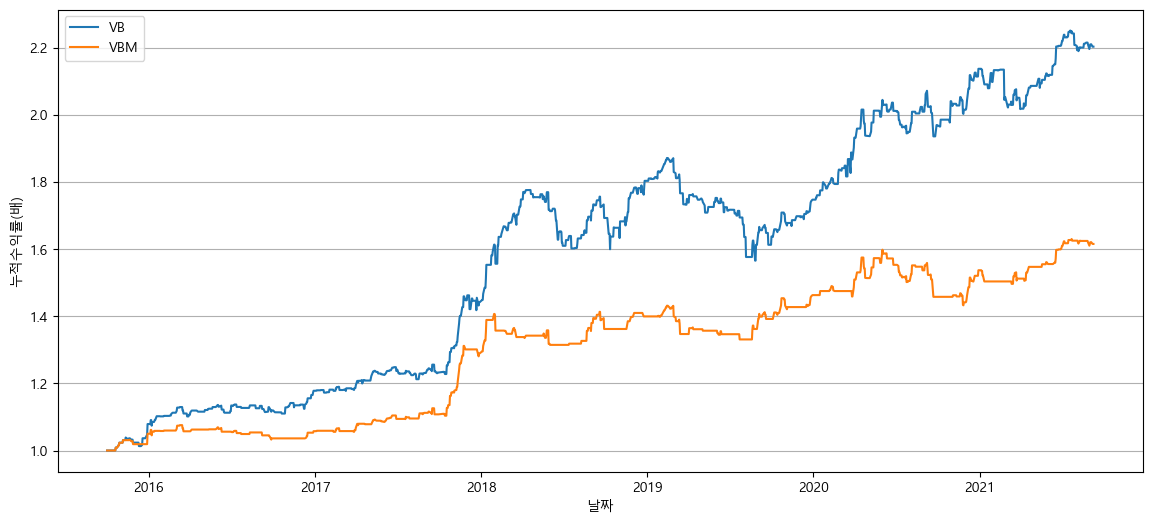

In [25]:
import matplotlib.pyplot as plt
import platform

# 한글 처리 
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['누적수익률'], label="VB")
ax.plot(df['누적수익률2'], label="VBM")

plt.xlabel('날짜')
plt.ylabel('누적수익률(배)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [26]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100

In [27]:
df['DD2'].max()

10.364643198700008

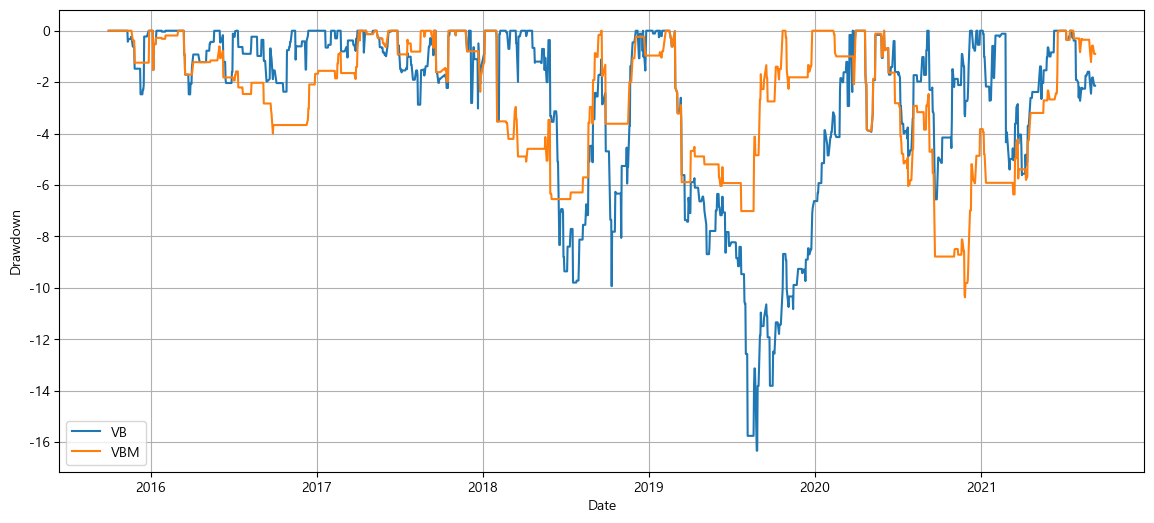

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['DD'] * -1, label='VB')
ax.plot(df.index, df['DD2'] * -1, label='VBM')

ax.grid()
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(loc='best')
plt.show()